
# Section 5: analysing celebrity faces
## Video 1: Downloading the data and visualising it

![overview image](http://mmlab.ie.cuhk.edu.hk/projects/celeba/overview.png)
Download the data here: http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

Click on the [Google Drive link](https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?usp=drive_open)


![download](illustrations/downloadceleba.png)



You can find more information about the data in [this research paper](https://arxiv.org/abs/1411.7766). It's a great paper, and you should try to look over it and try to understand what they do. Reading literature about deep learning is a great way to discover what you know and don't know!

After extracting the file, place the CelebA folder in the datasets folder. Note that on my Macbook extracting the first time did not work, I had to use [The Unarchiver, which is free in the app store](https://theunarchiver.com/). 

![datasets layout](illustrations/section5/mydatasetslayout.png)

In [1]:
import os
filenames = list()
labels = list()

## Set the paths for images and annotations
folder_base = 'datasets/CelebA/'
folder_images = os.path.join(folder_base,
                               "Img/img_align_celeba/img_align_celeba/")
filename_annotations = os.path.join(folder_base,
                                      "Anno/list_attr_celeba.txt")

with open(filename_annotations) as in_file:
    count_datapoints = int(in_file.readline())
    plaintext_labels = in_file.readline().split()
    
    for line in in_file:
        splitted = line.split()
        
        filenames.append(os.path.join(folder_images,splitted[0]))
        
        properties_celebrity = [float(x) for x in splitted[1:]]
        properties_celebrity = [max(0.0, x) for x in properties_celebrity]
        labels.append(properties_celebrity)
assert len(filenames) == len(labels)

print(labels[:4])
print(filenames[:4])



[[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]]
['datasets/CelebA/Img/img_align_celeba/img_align_celeba/000001.jpg', 'datasets/CelebA/Img/img_align_celeba/img_align_celeba/000002.jpg', 'datasets/CelebA/Img/img_align_celeba/img_align_celeba

['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


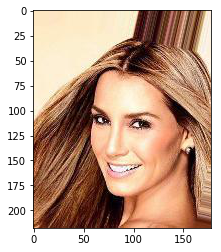

[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]


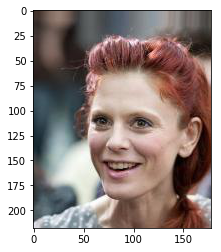

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


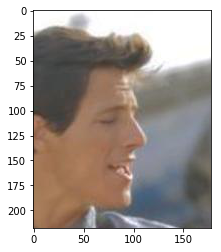

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


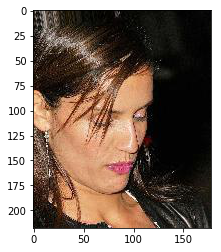

[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

SHOW_FIRST_N = 4
print(plaintext_labels)
for filename,properties in zip(filenames[:SHOW_FIRST_N],labels[:SHOW_FIRST_N]):
    image = plt.imread(filename)
    plt.imshow(image)
    plt.show()

    print(properties)

## Video 2: Building an input pipeline in Tensorflow
So far we loaded all data into our memory, and fed parts of it to our Tensorflow graph. In this section we are dealing with 1.78 gig of data, spread over 202.600 images. This is A LOT of data! Although we could probably load everything anyways, or load it outside of our graph when we need it, we can also build a whole input pipeline with Tensorflow. Take a look at this programmers guide for datasets: https://www.tensorflow.org/programmers_guide/datasets

In this video we are going to build an input pipeline with Tensorflow that reads images, does some operations on them, and gives them to us in batches. 


## Partitioning data into a train and test set
To show that you can even ask Tensorflow to split your data into a train and testset we will create a "partition vector". This partition vector will contain ones and zeros, and we will later use it to split our train and set set. 

In [3]:
from tensorflow.python.framework import ops
from tensorflow.python.framework import dtypes
import random

# convert string into tensors
all_images = ops.convert_to_tensor(filenames, dtype=dtypes.string)
all_labels = ops.convert_to_tensor(labels, dtype=dtypes.float32)

# create a partition vector
partitions = [0] * len(labels)
test_set_size = int(0.8 * len(labels))
partitions[:test_set_size] = [1] * test_set_size
random.shuffle(partitions)
print(partitions[0:20])

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]


### Dynamic partitioning and queues

We now have a partition vector: `[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]`. We will use the `tf.dynamic_partition` function to split this data into a train and test set: https://www.tensorflow.org/api_docs/python/tf/dynamic_partition. 

![dynamic partition](https://www.tensorflow.org/images/DynamicPartition.png)

The slice input producer "Produces a slice of each Tensor in tensor_list". We feed the train images and labels to this queue and will use it later to get our images from. 

In [4]:
import tensorflow as tf
import numpy as np

# partition our data into a test and train set according to our partition vector
train_images, test_images = tf.dynamic_partition(all_images, partitions, 2)
train_labels, test_labels = tf.dynamic_partition(all_labels, partitions, 2)

train_input_queue = tf.train.slice_input_producer(
                                    [train_images, train_labels],
                                    shuffle=False)
test_input_queue = tf.train.slice_input_producer(
                                    [test_images, test_labels],
                                    shuffle=False)
print(train_input_queue)

[<tf.Tensor 'input_producer/Gather:0' shape=() dtype=string>, <tf.Tensor 'input_producer/Gather_1:0' shape=(40,) dtype=float32>]


### Loading images from the train queue
![start input pipeline](illustrations/section5/start_input_pipeline.png)
The input_producer gives us filenames that we want to read. Every time we run `sess.run(train_input_queue)` we get a new filename. We can load this image using the `tf.read_file` function, and decode the jpeg with the `tf.image.decode_jpeg` function. 

In [5]:
NUM_CHANNELS = 3
file_content = tf.read_file(train_input_queue[0])
image = tf.image.decode_jpeg(file_content, channels=NUM_CHANNELS)

### Starting queuerunners
Now that we are dynamically loading images we have to do a bit more every time we want to run our graph in a session. We have to create a `Coordinator` and start the queue runners. More information can be found here in the documentation: https://www.tensorflow.org/versions/r0.12/api_docs/python/train/coordinator_and_queuerunner

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

(218, 178, 3)


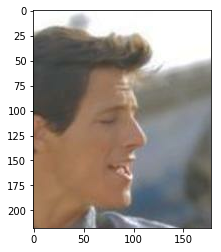

(218, 178, 3)


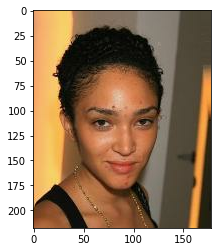

(218, 178, 3)


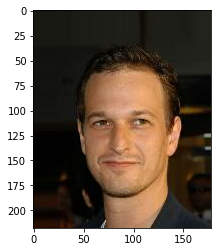

(218, 178, 3)


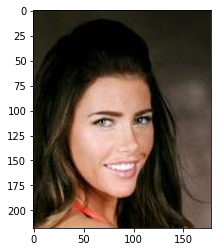

(218, 178, 3)


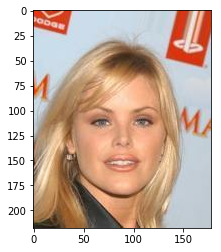

In [7]:
for _ in range(5):
    img_from_queue = sess.run(image)
    print(img_from_queue.shape)
    plt.imshow(img_from_queue)
    plt.show()

### Changing our input stream
Great! It looks like we are able to load images from our input stream. Next video we are going to classify these images, but before we do that I would like to "preprocess" the images. Right now they are 218 by 178, and there is a lot of background around the images. Luckily we can add Tensorflow functions to our graph that resize and crop our images. If we create a function that does this we can apply this function to our train and test image pipeline.


In [8]:
IMAGE_HEIGHT = 48 # original size: 218
IMAGE_WIDTH = 48 # original size: 178
BATCH_SIZE = 32
def load_image_in_graph(queue):
    file_content = tf.read_file(queue[0])
    image = tf.image.decode_jpeg(file_content, channels=NUM_CHANNELS)
    cropped_image = tf.image.central_crop(image, 0.5)
    resized_image = tf.image.resize_images(cropped_image,(IMAGE_HEIGHT,IMAGE_WIDTH))
    return resized_image

train_image = load_image_in_graph(train_input_queue)
train_label = train_input_queue[1]

test_image = load_image_in_graph(test_input_queue)
test_label = test_input_queue[1]

### Batching
As you know by now we prefer to feed multiple images at the same time in a batch to our neural network. The output of our pipeline is only one image at the same time, but we can fix this by using the `tf.train.batch` function in Tensorflow!

In [9]:
train_image.set_shape([IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS])
test_image.set_shape([IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS])

# collect batches of images before processing


train_image_batch, train_label_batch = tf.train.batch([train_image, 
                                               train_label], 
                                               batch_size=BATCH_SIZE)
test_image_batch, test_label_batch = tf.train.batch([test_image, 
                                               test_label], 
                                               batch_size=BATCH_SIZE)

This makes our last part of the pipeline look like this: 
![end input pipeline](illustrations/section5/end_input_pipeline.png)


### Using our input stream
In this video we built a whole input stream, let's test if we get a batch, and let's see if our input images still make sense.


(32, 48, 48, 3)
(48, 48, 3)


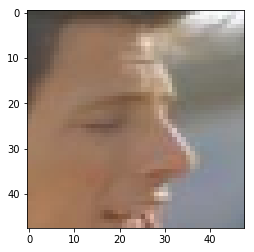

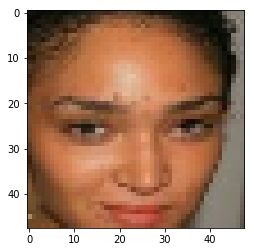

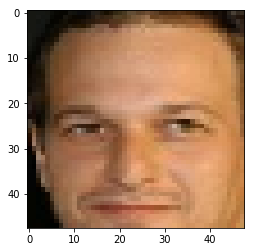

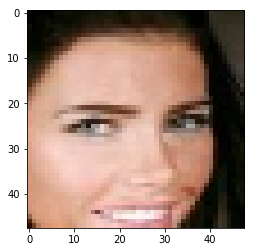

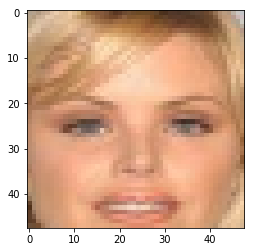

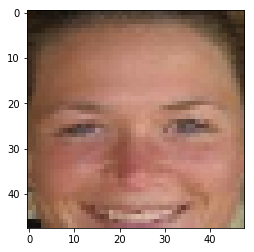

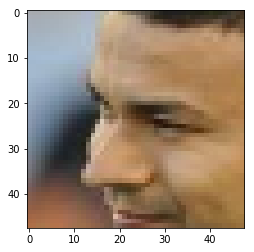

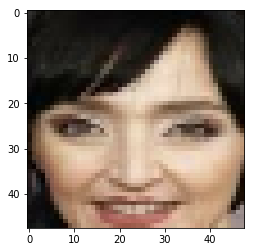

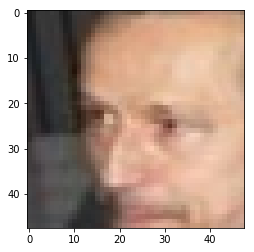

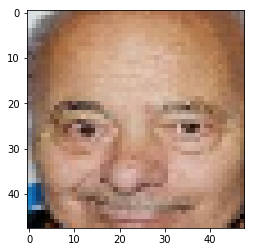

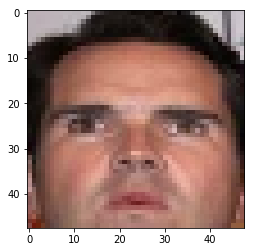

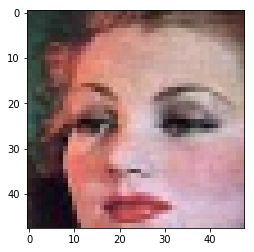

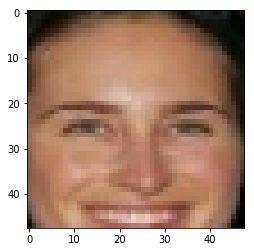

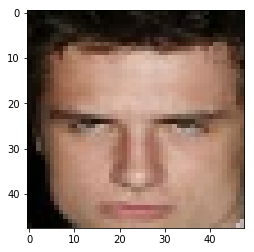

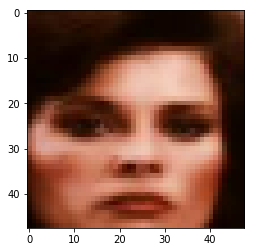

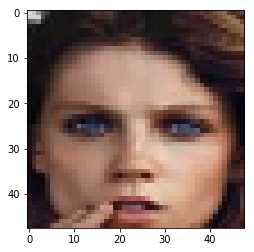

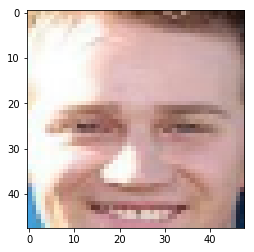

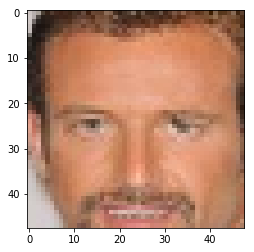

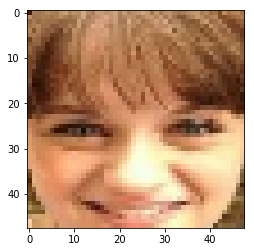

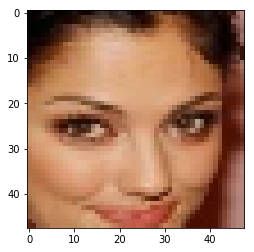

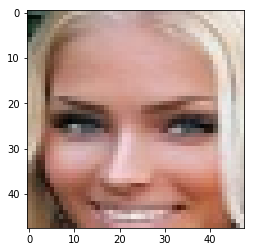

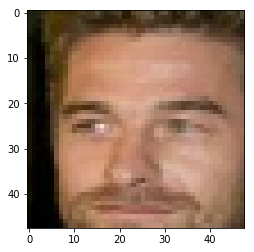

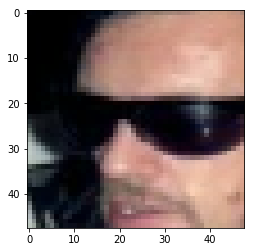

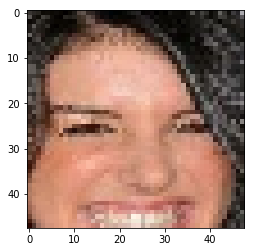

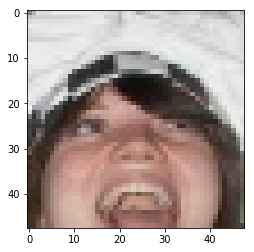

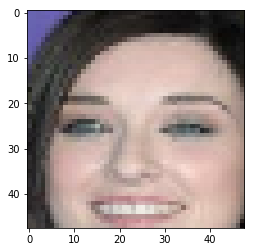

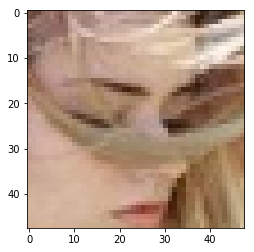

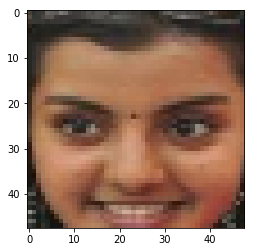

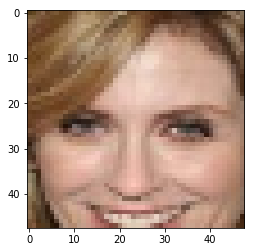

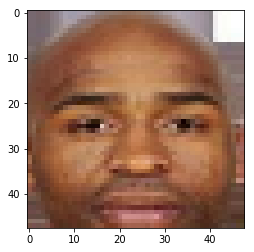

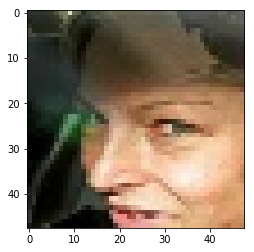

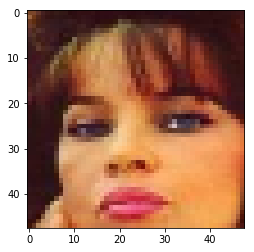

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

now_images, now_labels = sess.run([train_image_batch, train_label_batch])
print(now_images.shape)
print(now_images[0,:,:,:].shape)

now_images = now_images.astype(np.uint8)
for im in now_images:
    plt.imshow(im)
    plt.show()

![end input pipeline](illustrations/section5/wholepipeline.png)

## Video 3: Building a conv + max pool network
Last section we were able to preprocess and load the images from our input pipeline. We already discussed that some of the features are easier to detect, and some more difficult. Neural networks generally don't like it if your data is "sparse". As there are not that many bald celebrities, there aren't a lot of training samples for this class, so training is more difficult if we try to do everything at once. 

To counter this I decided to manually pick some features I find interesting to predict. Some features I expect will be easy (male/female), and others will be more difficult (attractive: beauty is in the eye of the beholder!).

In [11]:
INTERESTING_PROPERTIES = [2,9,18,19,20,21]
for prop_index in INTERESTING_PROPERTIES:
    print(plaintext_labels[prop_index])

Attractive
Blond_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open


#### Convolutional network
As first attempt I created a simple convolutional neural network with conv layers and max pooling layers. Feel free to adjust this network yourself, as I did not optimize it at all! The last dense layer has 40 neurons: one for every feature. This way you can easily adjust the INTERESTING_PROPERTIES variable above and retrain the network without adjusting the whole network configuration. 

In [12]:
train_image_batch_float = tf.cast(train_image_batch, dtype=tf.float32)
train_image_batch_float_norm = tf.divide(tf.subtract(train_image_batch_float,128),128)

conv1_1 = tf.layers.conv2d(train_image_batch_float_norm, 32, [5,5],activation=tf.nn.relu)
conv1_2 = tf.layers.conv2d(conv1_1, 32, [5,5],activation=tf.nn.relu)
maxp1 = tf.layers.max_pooling2d(conv1_2, [2,2], strides=2)

conv2_1 = tf.layers.conv2d(maxp1, 64, [3,3], activation=tf.nn.relu)
maxp2 = tf.layers.max_pooling2d(conv2_1, [2,2], strides=2)

conv3 = tf.layers.conv2d(maxp2, 128, [3,3], activation=tf.nn.relu)
print(conv3)

res = tf.contrib.layers.flatten(conv3)
print(res)

dense1 = tf.layers.dense(res,1024, activation=tf.nn.relu)
dense2 = tf.layers.dense(dense1,256, activation=tf.nn.relu)
dense3 = tf.layers.dense(dense2,40, activation=None)
print(dense3)


Tensor("conv2d_4/Relu:0", shape=(32, 7, 7, 128), dtype=float32)
Tensor("Flatten/Reshape:0", shape=(32, 6272), dtype=float32)
Tensor("dense_3/BiasAdd:0", shape=(32, 40), dtype=float32)


### Loss function
Note that for this network we can't use the softmax cross entropy loss function. Softmax would make all outputs sum to one, but we have to predict multiple labels in one vector. A person can be bald, male, and have its mouth slightly open. If you want to keep using the cross entropy function you might want to take a look at the `tf.losses.sigmoid_cross_entropy` loss function, but in this case I decided to use our familiar mean squared error as loss function!

To really determine the loss for our properties we have to select some features out of our labels and final layer. We do this with the `tf.gather` function. You give the output tensor of our network, and the indices you want to keep. Try to print the output tensors to verify their shape!

In [13]:
interesting_labels = tf.gather(train_label_batch,INTERESTING_PROPERTIES,axis=1)
interesting_prediction = tf.gather(dense3,INTERESTING_PROPERTIES,axis=1)

loss = tf.losses.mean_squared_error(interesting_labels, interesting_prediction)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=interesting_labels,logits=interesting_prediction))
print(loss)

optimizer = tf.train.AdamOptimizer().minimize(loss)

Tensor("Mean:0", shape=(), dtype=float32)


Let's make a variable for the amount of iterations we want to train our network:

In [14]:
TRAIN_ITERATIONS = 1000

You will be familiar with almost all of the code in this part!
- We make a session, initialise global variables and start the queue runners to read our images. 
- We train for a certain amount of iterations. Because we load data through our TensorFlow graph we don't have any variables for our feed dict!

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

loss_history = list()

for iteration in range(TRAIN_ITERATIONS):
    _, l = sess.run([optimizer, loss])
    loss_history.append(l)
    
    if iteration%100==0:
        print(l)
    

0.694378
0.414215
0.353216
0.434557
0.355855
0.246769
0.254913
0.270215
0.285934
0.237838


Let's plot our loss history! To compare this run with later runs I make a function that prints the average of the last 100 training iterations. I also save our loss history in a variable so we can plot it with an effort we take later. 

0.27916849792


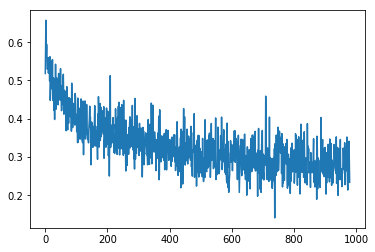

In [16]:
plt.plot(loss_history[20:])

def last_avg(inputlist):
    print(sum(inputlist[-100:])/100)
last_avg(loss_history)
loss_first_attempt = loss_history

## Video 4: batch normalisation
In the current neural network we brought our images back from an input range of 0-256 till -1 till 1. Imagine we remove this line after training, but keep the rest of the network weights the same, do you think it will perform well? 

The answer is: no, it won't. It's very important in neural networks that the distribution of data you put into your neural network during training stays the same. We also saw in section 3 that preprocessing our data to fit a certain distribution really helped our performance!

What's interesting is that although we keep the input distribution roughly the same, the layers in the neural network change their weights, and with this the output distribution of a single layer keeps changing. 

Let's say you have a five layer neural network. The fifth layer receives input from the fourth layer. During backpropagation we first adjust the fifth layer, that learns from input the fourth layer gave. Then we adjust the fourth layer, which changes the output to to fifth layer! Although this change is small, it turns out that neural networks learn faster and better if they keep receiving the same distribution of input. 

This is where batch normalization comes in. The batch normalization layer takes a tensor as input, and outputs a tensor that is either normalizes with statistics of the current batch, or with moving statistics. With the batch normalization there is an important difference between the training and inference phase. 
- During training the output should be normalized with statistics of the current batch
- During inference the output should be normalized with moving statistics

Luckily there is a simple function you can use to add a batch normalization layer: `tf.layers.batch_normalization(inputs,training=False, ...)`. Although you can supply a lot of arguments, the most important one to set is the training argument. As you now know there is a difference between training and inference, and this is what you indicate here. The training argument CAN be a placeholder, so let's add a boolean placeholder to indicate if we are in the training phase or in the inference phase. 


In [17]:
is_training = tf.placeholder(tf.bool, name='is_training')

And let's copy past our code and add batch normalization between all of the layers! Note that I even apply it on the input of our network!

In [18]:
# batch_0 = tf.layers.batch_normalization(train_image_batch_float_norm,training=is_training)
# conv1_1 = tf.layers.conv2d(batch_0, 32, [5,5],activation=tf.nn.relu)

# batch_1 = tf.layers.batch_normalization(conv1_1,training=is_training)
# conv1_2 = tf.layers.conv2d(conv1_1, 32, [5,5],activation=tf.nn.relu)
# maxp1 = tf.layers.max_pooling2d(conv1_2, [2,2], strides=2)

# batch_2 = tf.layers.batch_normalization(maxp1,training=is_training)
# conv2_1 = tf.layers.conv2d(maxp1, 64, [3,3], activation=tf.nn.relu)
# maxp2 = tf.layers.max_pooling2d(conv2_1, [2,2], strides=2)

# batch_3 = tf.layers.batch_normalization(maxp2,training=is_training)
# conv3 = tf.layers.conv2d(batch_3, 128, [3,3], activation=tf.nn.relu)

# res = tf.contrib.layers.flatten(conv3)

# batch_4 = tf.layers.batch_normalization(res,training=is_training)
# dense1 = tf.layers.dense(batch_4,1024, activation=tf.nn.relu)

# batch_5 = tf.layers.batch_normalization(dense1,training=is_training)
# dense2 = tf.layers.dense(batch_5,256, activation=tf.nn.relu)

# batch_6 = tf.layers.batch_normalization(dense2,training=is_training)
# dense3 = tf.layers.dense(batch_6,40, activation=None)


batch_0 = tf.layers.batch_normalization(train_image_batch_float_norm,training=is_training)
conv1_1 = tf.layers.conv2d(batch_0, 32, [5,5],activation=tf.nn.relu)

batch_1 = tf.layers.batch_normalization(conv1_1,training=is_training)
conv1_2 = tf.layers.conv2d(batch_1, 32, [5,5],activation=tf.nn.relu)
maxp1 = tf.layers.max_pooling2d(conv1_2, [2,2], strides=2)

batch_2 = tf.layers.batch_normalization(maxp1,training=is_training)
conv2_1 = tf.layers.conv2d(batch_2, 64, [3,3], activation=tf.nn.relu)
maxp2 = tf.layers.max_pooling2d(conv2_1, [2,2], strides=2)

batch_3 = tf.layers.batch_normalization(maxp2,training=is_training)
conv3 = tf.layers.conv2d(batch_3, 128, [3,3], activation=tf.nn.relu)

res = tf.contrib.layers.flatten(conv3)

batch_4 = tf.layers.batch_normalization(res,training=is_training)
dense1 = tf.layers.dense(batch_4,1024, activation=tf.nn.relu)

batch_5 = tf.layers.batch_normalization(dense1,training=is_training)
dense2 = tf.layers.dense(batch_5,256, activation=tf.nn.relu)

batch_6 = tf.layers.batch_normalization(dense2,training=is_training)
dense3 = tf.layers.dense(batch_6,40, activation=None)



Another important thing to know is that by using the batch norm function Tensorflow DOES add update operations to update the rolling mean and average for the batch normalization layers. However, as your optimizer does not directly use these variables, you have to let Tensorflow know that he has to update them. 

You can either get these variables using `update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)` and passing `update_ops` to `sess.run`. You can also use `with tf.control_dependencies(update_ops):` before defining your optimizer to automatically make TensorFlow aware of this fact. 

In [19]:
interesting_labels = tf.gather(train_label_batch,INTERESTING_PROPERTIES,axis=1)
interesting_prediction = tf.gather(dense3,INTERESTING_PROPERTIES,axis=1)
#loss = tf.losses.mean_squared_error(interesting_labels, interesting_prediction)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=interesting_labels,logits=interesting_prediction))

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    train_op = tf.train.AdamOptimizer().minimize(loss)


Note that we now have to indicate if we are training or inferencing when working with this network, so we pass a feed_dict with a value for our placeholder to the `sess.run` function. 

In [20]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

loss_history = list()
for iteration in range(TRAIN_ITERATIONS):
    _, l, is_train = sess.run([train_op, loss, is_training], feed_dict={is_training: True})
    loss_history.append(l)
    
    if iteration%100==0:
        print(l)

0.946628
0.412679
0.36377
0.367981
0.336173
0.219411
0.252725
0.226577
0.275235
0.250561


0.280264455378


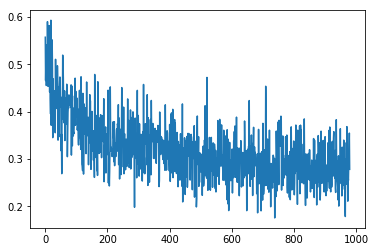

In [21]:
plt.plot(loss_history[20:])
last_avg(loss_history)
batch_norm_losses = loss_history

Let's plot both losses and compare them!

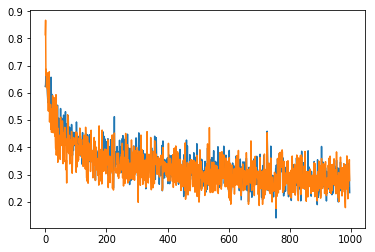

In [22]:
plt.plot(loss_first_attempt[3:])
plt.plot(batch_norm_losses[3:])
plt.show()


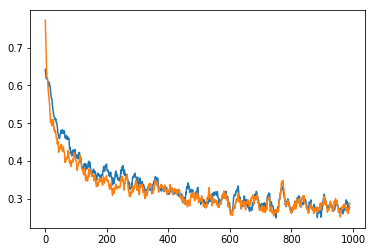

In [23]:
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):-N]

plt.plot(runningMeanFast(loss_first_attempt,10))
plt.plot(runningMeanFast(batch_norm_losses,10))
plt.show()

As you can see by using batch normalisation our network has a better performance! If we were to use another optimizer, where we had to set a learning rate, we could have used a larger learning rate with batch normalisation!

Especially if you work work with larger networks batch normalization can really boost your performance! A slightly more mathematical and practical perspective can be found in this [blog post](https://gab41.lab41.org/batch-normalization-what-the-hey-d480039a9e3b). 

## Video 5: Understand what your network learned: visualizing layers and activations

A cool thing about neural networks is that you can see what your neuron reacts to. For normal neurons this can be difficult to see, especially in deeper layers. For convolutional layers however this can be a vital step to inspecting what your network actually learned. 

### Why is this important
Although we humans are good at knowing exactly what to look for when classifying an image, a neural network has to learn this from scratch. Some famous stories tell about the US building neural networks to classify tanks. As training data for the American tanks they took some pictures of the tanks outside of their base. For the Russian tanks they used spy cameras. Although the network performed great on the train and testset it did not work at all in the field... It turned out that the neural network learned the difference between a blurry image (taken with a spy camera) and a clear image (taken at the base itself). 

Another great example to consider is classifying if something is a wolf or a dog. Give it a try: 

![Search result dog](illustrations/dogsearch.png)
![Search result wolf](illustrations/wolfsearch.png)

What you might use to see the different are that wolfs have pointing up ears and thick fur. A neural network could go for totally different features: apparently dogs like to sit in green grass, and wolfs are often found in the snow. If you take the classefier you trained on this data to the local zoo it would likely not recognise the wolfs if there is no snow in the zoo. 


We are going to take a look at the activations of our layers, and will see if we can detect some nice features. 


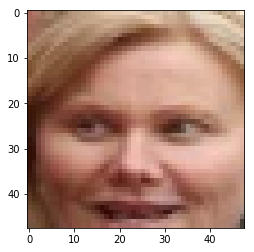

(44, 44, 32)
VISUALISING LAYER!


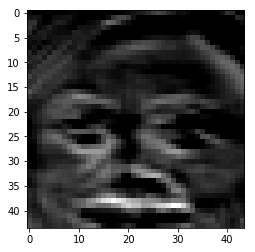

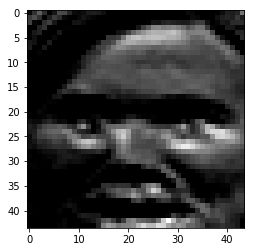

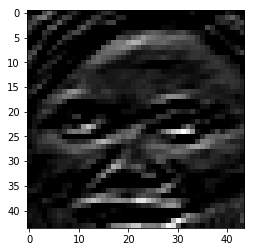

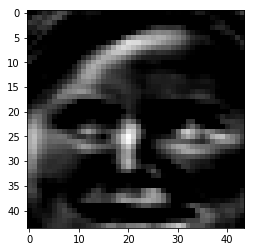

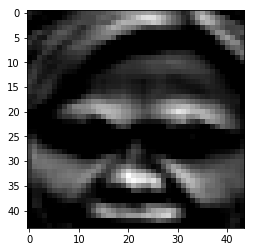

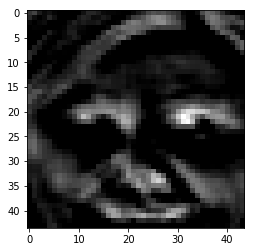

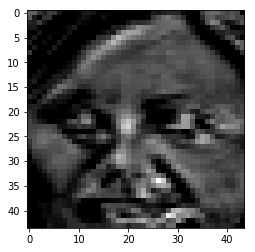

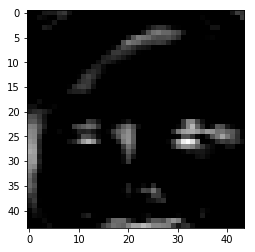

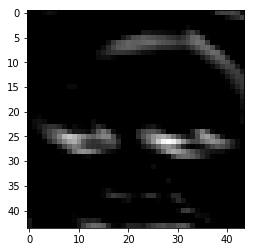

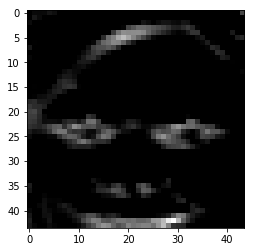

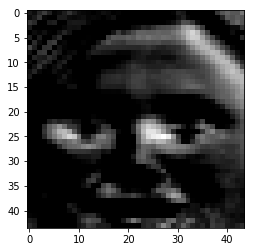

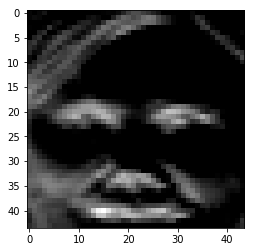

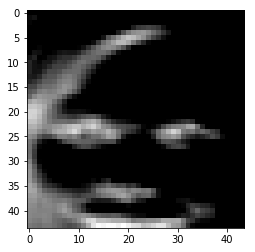

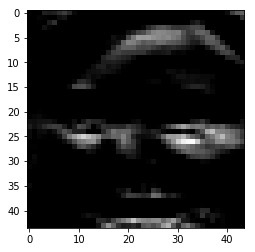

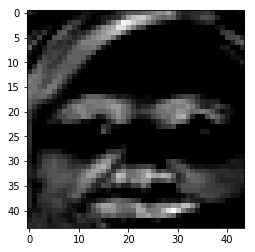

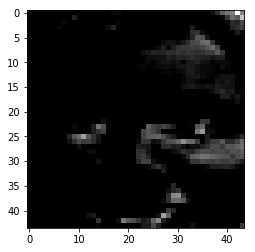

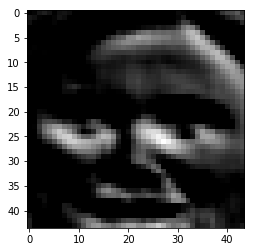

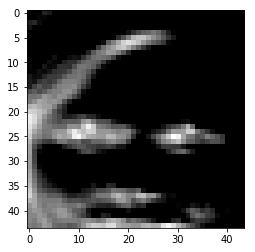

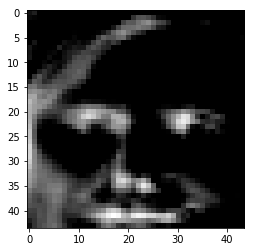

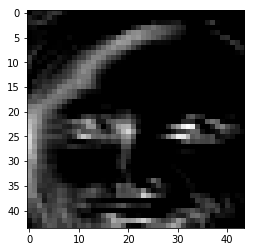

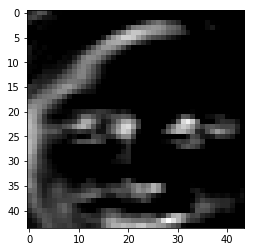

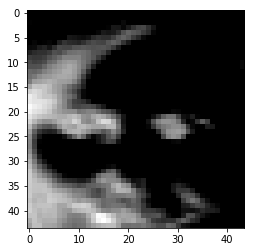

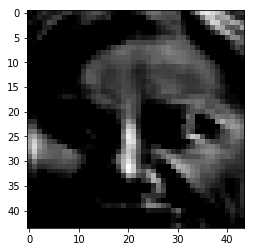

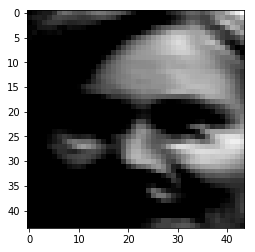

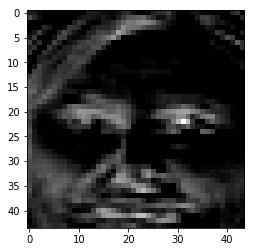

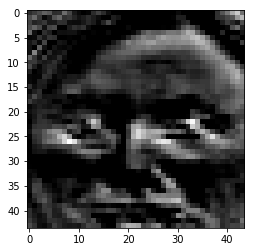

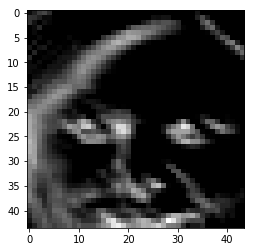

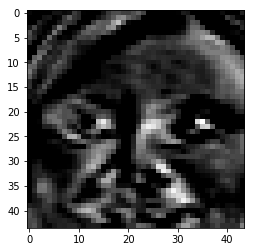

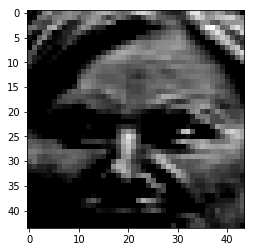

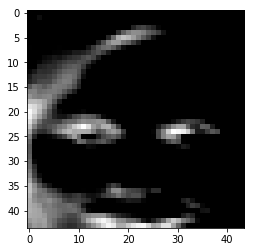

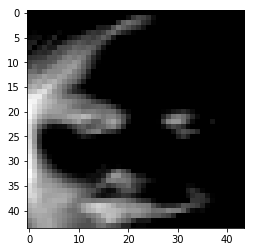

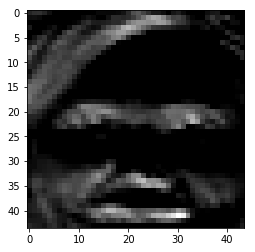

In [24]:
input_images, conv_layer_activations = sess.run([train_image_batch, conv1_1], feed_dict={is_training: False})
input_images = input_images.astype(np.uint8)
plt.imshow(input_images[0,:,:,:])
plt.show()
to_visualise = conv_layer_activations[0,:,:,:]
print(to_visualise.shape)
print("VISUALISING LAYER!")
for outputlayer in range(to_visualise.shape[2]):
    plt.imshow(to_visualise[:,:,outputlayer],cmap="gray")
    plt.show()

Note that there are several feature layers for hair, the eyes, skin, and mouth. Thinking yourself about extracting these specific features would probably be a lot of work, and now this network is doing it for you!

### Drawing the ROC curve

As final exercise let's evaluate how well our network is doing. Although we know the loss, it's a good idea to take a look at how we are going to deploy our application. 

Let's imagine we use this system to count how many men walk past our house. As output vector we have activations, which are hopefully around 0 if someone is a female, and around 1 if someone is male. We have to use a treshold on this activation to determine if we label someone as male or as female. If we set the treshold to detect a man really high (like: 0.9) we won't accidentally count women, but might miss a few men. If we set the treshold low (like: 0.1) we will probably count all men, but might also count some women. 

To determine the treshold you can use the [ROC curve](https://nl.wikipedia.org/wiki/ROC-curve). For several tresholds you determine how many false positives you have (accidentally classified male), and the percentage of men you indeed recognised (percentage true positives). You can now select the ratio you find acceptable. To help you with this you can draw the ROC curve, to see how well your network performs. 

One option to calculate the ROC curve is take multiple tresholds, and calculate false positives 

You can calculate the ROC curve yourself, but you can also feed the labels and predictions your network made to the SKLearn metrics `roc_curve` function: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

#### Test data
In the second video we created the input pipeline for the train and testset. The batch size of this was 32, but to truly say something about our network we have to evaluate more batches of data. Let's first get a certain amount of images out of our test image pipeline, which we later feed to the network for processing. We save all predictions and labels in lists...

In [25]:
EVAL_BATCH_COUNT = 20
evaluate_labels = list()
evaluate_predicted = list()
for _ in range(EVAL_BATCH_COUNT):
    ## Get the images and labels we will evaluate
    test_images, test_labels = sess.run([test_image_batch, test_label_batch])

    ## Get the prediction for these images
    predicted = sess.run(dense3, feed_dict={train_image_batch:test_images, 
                                            is_training: False})
    
    ## Save the predictions and labels in our lists
    evaluate_labels.extend(test_labels)
    evaluate_predicted.extend(predicted)

Then it's time to draw the ROC curve. Feature by feature we get labels and activations, give this to the `sklearn.metrics.roc_curve` function, and plot the output. We will also print the area under the curve, as this is an indication of how well our model performs. 

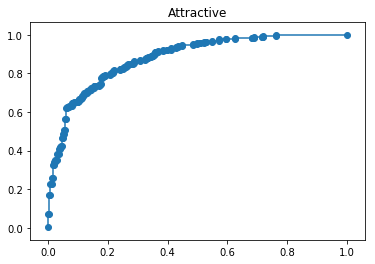

0.880481369962


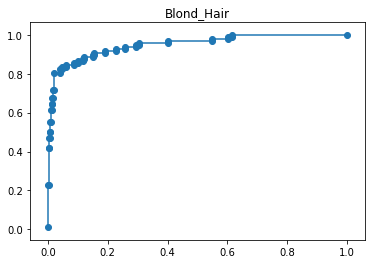

0.949582567402


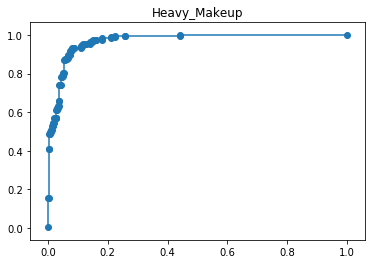

0.969330922242


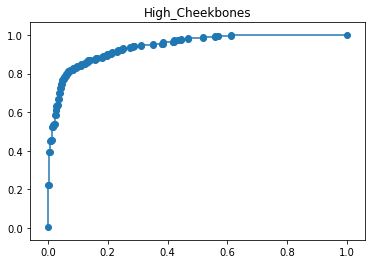

0.940439551768


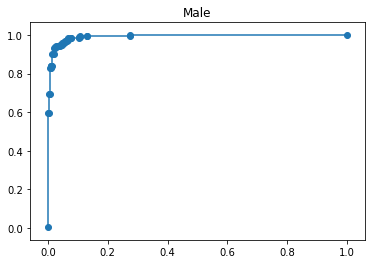

0.992497954436


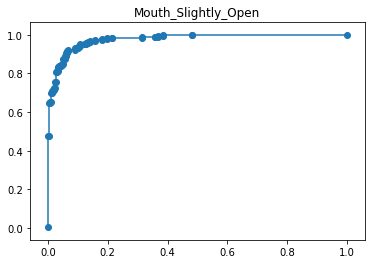

0.97692255083


In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn


for index in INTERESTING_PROPERTIES:
    ## Select the labels in the index we are interested in  
    train_roc_labels = [x[index] for x in evaluate_labels]
    train_roc_predicted = [x[index] for x in evaluate_predicted]
    
    ## Calculate our ROC curve
    roc_result = sklearn.metrics.roc_curve(train_roc_labels, train_roc_predicted)

    ## Draw our ROC curve
    plt.scatter(roc_result[0], roc_result[1])
    plt.plot(roc_result[0], roc_result[1])
    plt.title(plaintext_labels[index])
    plt.show()
    
    ## Print area under curve
    print(roc_auc_score(train_roc_labels, train_roc_predicted))


### Conclusion
We now know what features our network can easily predict, and about what features our network is confused. As this marks the end of this section improving this neural network is up to you! You can try to manually add or remove layers, change the loss function, try to predict different features...

Hopefully you learned a lot in all of these sections, and remember that you can revisit sections and apply knowledge you learned later in earlier sections to improve your results there!